In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('weight-height.csv')

In [48]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [49]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


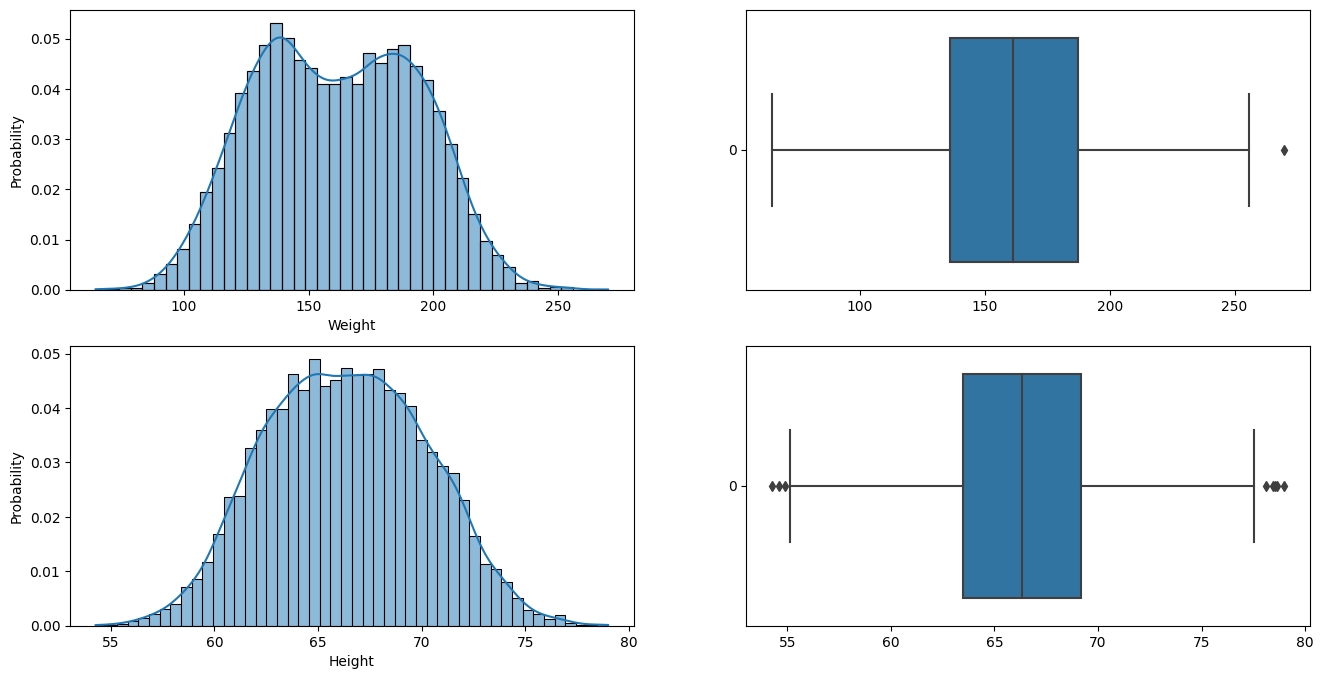

In [50]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['Weight'],kde=True,stat='probability',legend=True)

plt.subplot(2,2,2)
sns.boxplot(df['Weight'],orient='h')


plt.subplot(2,2,3)
sns.histplot(df['Height'],kde=True,stat='probability',legend=True)

plt.subplot(2,2,4)
sns.boxplot(df['Height'],orient='h')

plt.show()

## Note:
      1. Above we can say weight is normally distributed and as very very outlier.
      2. Height has close to normally distributed pdf and it has outlier in it.

In [51]:
df.shape

(10000, 3)

In [52]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [53]:
upper_limit = df['Height'].quantile(0.99) # above 99 percentile outlier is present
lower_limit = df['Height'].quantile(0.01) # since equal amount to be left from right

In [54]:
upper_limit

74.7857900583366

In [55]:
lower_limit

58.13441158671655

## Outlier Detection

In [56]:
df[(df['Height'] >= 74.785) | (df['Height'] <= 58.13)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


## Trimming

In [57]:
df[(df['Height'] <= 74.785) & (df['Height'] >= 58.13)]

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [58]:
new_df = df[(df['Height'] <= 74.785) & (df['Height'] >= 58.13)]

In [59]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

In [60]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

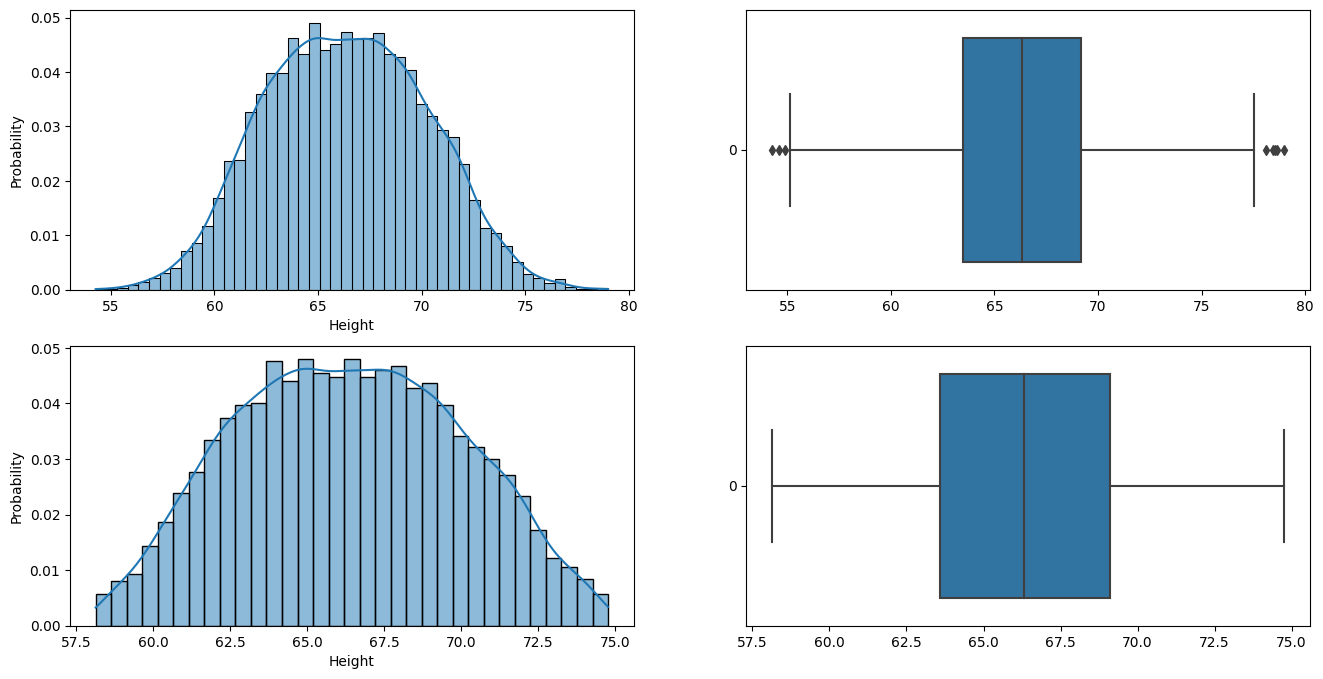

In [61]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['Height'],kde=True,stat='probability',legend=True)

plt.subplot(2,2,2)
sns.boxplot(df['Height'],orient='h')


plt.subplot(2,2,3)
sns.histplot(new_df['Height'],kde=True,stat='probability',legend=True)

plt.subplot(2,2,4)
sns.boxplot(new_df['Height'],orient='h')

plt.show()

## Capping (Winsorization)

In [62]:
org_df = pd.DataFrame(df)

In [63]:
df['Height']=np.where(df['Height']>=upper_limit,upper_limit,
         np.where(df['Height']<lower_limit,lower_limit,df['Height']))

In [64]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

In [65]:
org_df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

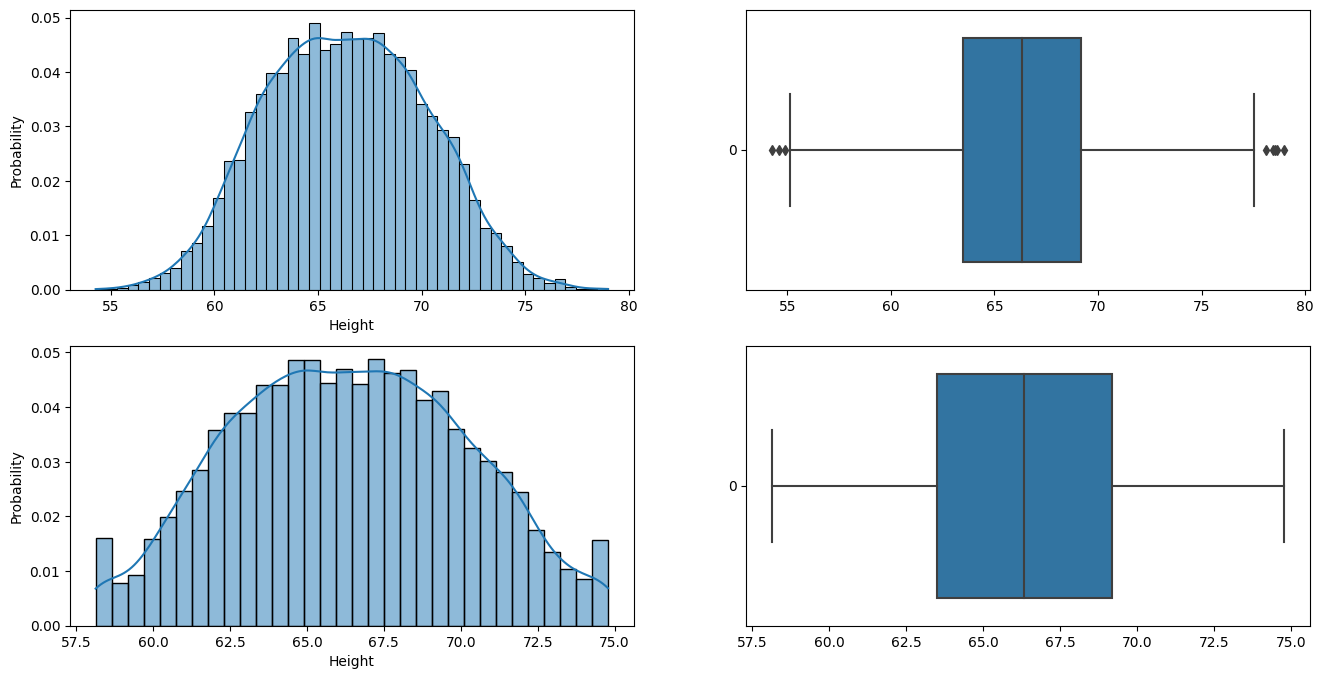

In [67]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(org_df['Height'],kde=True,stat='probability',legend=True)

plt.subplot(2,2,2)
sns.boxplot(org_df['Height'],orient='h')


plt.subplot(2,2,3)
sns.histplot(df['Height'],kde=True,stat='probability',legend=True)

plt.subplot(2,2,4)
sns.boxplot(df['Height'],orient='h')

plt.show()